$$Energy : \sum_{k = 1}^K \| x_i - c_{k_i} \|^2 $$
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

$$Accuracy : \frac{\sum_{k = 1}^K m_k}{N}$$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.


In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [37]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

list_image  = np.empty((size_row * size_col, num_image), dtype=float) 
list_label  = np.empty(num_image, dtype=int)

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0] 
    im_vector   = np.asfarray(line_data[1:]) 
    im_vector   = normalize(im_vector) # normalize the values of the input 
                                       #data to be [0, 1]
    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

In [38]:
#
# distance function between two vectors x and y
#
def Distance(x, y):

    d = (x - y) ** 2   
    s = np.sum(d)

    return(s)

In [39]:
def generateCluster(cluster_num,image_num):#function that genarates variables 
                                            #essential for k-means algorithm
    k=cluster_num                               #k is the number of cluster
    label=np.zeros(image_num)                   #label of ecah image
    average_image=np.zeros((size_row * size_col,cluster_num), dtype=float) 
                                                 #average image of sane label
    distance=np.zeros((cluster_num,image_num), dtype=float)#distances between images 
                                                     #and average image(centroid)
    
    return k,label,average_image,distance

In [40]:
def initializeLabel(cluster_num,label): #randomly initialize labels
    random_seed=np.random.rand(len(label))*100 #variable that will be substituted 
                                               #to the label
    for i in range(len(label)):                   
        random_seed[i]=int(random_seed[i])
        random_seed[i]=random_seed[i]%cluster_num#randomly initialize labels
    for i in range(len(label)):                       
        label[i]=random_seed[i]                  #label is randomly initialized 
    return

def computeCentroid(cluster_num,list_image,label):  #compute the average(center) of 
                                                #listimage sharing  same label
    sum=np.zeros((size_row * size_col,cluster_num))     #variable for the sum
    num=np.zeros(cluster_num)                   #variable for dividing sum
    for i in range(list_image.shape[1]):            
        sum[:,int(label[i])]=sum[:,int(label[i])]+list_image[:,i]#must change 
                                                    #the type of label[i] to type(int)
        num[int(label[i])]=num[int(label[i])]+1  #count the number
    for i in range(cluster_num):
        sum[:,i]/=num[i]                         #sum goes to be a mean value
    return sum     

def assignLabel(list_image,average_image,label,distance): #compute the distance 
                                                #average images and images. 
                                                #And update the label of points
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):
            distance[j,i]=Distance(average_image[:,j],list_image[:,i])
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):               
            if distance[j,i]==distance[:,i].min():  #when thd distance is minimum
                label[i]=j                          #update label
    return

def represent(label,list_label,num):#num : 0 ~ k-1. we don't know what the most number 
                                    #in the cluster(num)'s is. this funstion 
                                    #will return the most number of certain cluster.
    num_arr=np.zeros(10)
    num_rep=-1
    for i in range(len(label)):
        if(label[i]==num):
            num_arr[list_label[i]]+=1
    for i in range(10):
        if(num_arr.max()==num_arr[i]):
            num_rep=i
    return num_rep                  #return the number that appeared the most

def plotCentoidImages(label,list_label,average_image):  #plot average_image(center) 
    plt.figure(figsize=(10,10))
    for i in range(average_image.shape[1]):   
        plt.subplot(5,10, i+1)
        plt.title(represent(label,list_label,i))
        plt.imshow(average_image[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()
    return

def computeAccuracy(label,list_label,cluster_num): #compute the accuracy
    sum=0
    num_arr=np.zeros(10)
    for j in range(cluster_num):
        num=0
        for ii in range(10):
            num_arr[ii]=0
        for i in range(len(label)):
            if(label[i]==j):
                num_arr[list_label[i]]+=1
                num+=1
        sum+=num_arr.max()/num
    return 100*sum/cluster_num  #accuracy will be returned 

def plotEnergyAndAccuracy(energy,accuracy): #plot the energy and accuracy
    plt.figure(1)
    x=np.arange(1,len(energy)+1)
    plt.plot(x, energy, 'b', label="energy")
    plt.plot(x, accuracy, 'r', label="accuracy")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [41]:
def computeEnergy(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                             #images and corresponding average images(center)
    return energy_sum/distance.shape[1]

$$K = 5$$

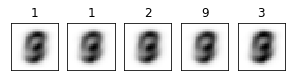

In [42]:
k,label,average_image,distance=generateCluster(5,count) #choose the num of cluster
initializeLabel(k,label) #randomly initialize labels
average_image=computeCentroid(k,list_image,label) #compute the average image
plotCentoidImages(label,list_label,average_image) #plot the average images

1th iteration -   Energy:  52.25723512513713  Accuracy:  35.75447950024642
2th iteration -   Energy:  45.479965749608915  Accuracy:  38.369560396402264
3th iteration -   Energy:  44.65554443630994  Accuracy:  39.22735644720238
4th iteration -   Energy:  44.198802485730475  Accuracy:  39.7887159253548
5th iteration -   Energy:  43.98750863453897  Accuracy:  39.973593857681266
6th iteration -   Energy:  43.91144344192165  Accuracy:  39.99194420565037
7th iteration -   Energy:  43.88122106254927  Accuracy:  39.90530709987428
8th iteration -   Energy:  43.86816131185402  Accuracy:  39.86474963014958
9th iteration -   Energy:  43.860764515881925  Accuracy:  39.888208446291564
10th iteration -   Energy:  43.85550575023779  Accuracy:  39.83091519648547
11th iteration -   Energy:  43.85065660584358  Accuracy:  39.79521261896976
12th iteration -   Energy:  43.845165805227765  Accuracy:  39.74410852378907
13th iteration -   Energy:  43.83580540682713  Accuracy:  39.71251702661498
14th iteration 

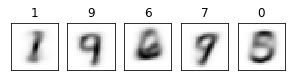

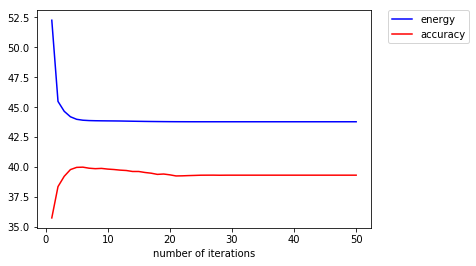

In [43]:
energy=[] #array for energy
accuracy=[] #array for accuracy
num_iteration=0 
for i in range(50): 
    assignLabel(list_image,average_image,label,distance) #update labels
    average_image=computeCentroid(k,list_image,label)    #update average_image
    energy.append(computeEnergy(distance))
    accuracy.append(computeAccuracy(label,list_label,k))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance)," Accuracy: ",computeAccuracy(label,list_label,k))
plotCentoidImages(label,list_label,average_image)    #plot average_image
plotEnergyAndAccuracy(energy,accuracy) #plot energy and accuracy

$$K = 10$$

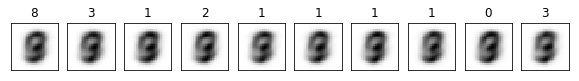

In [44]:
k,label,average_image,distance=generateCluster(10,count) #choose the num of cluster
initializeLabel(k,label) #randomly initialize labels
average_image=computeCentroid(k,list_image,label) #compute the average image
plotCentoidImages(label,list_label,average_image) #plot the average images

1th iteration -   Energy:  52.02479055349292  Accuracy:  38.20588357392296
2th iteration -   Energy:  42.42612627761604  Accuracy:  49.34799284651335
3th iteration -   Energy:  40.48806563399173  Accuracy:  54.479801074963405
4th iteration -   Energy:  39.77559655199504  Accuracy:  57.25912695060407
5th iteration -   Energy:  39.5045725514162  Accuracy:  58.9318113165034
6th iteration -   Energy:  39.36481049927527  Accuracy:  60.00875841237589
7th iteration -   Energy:  39.27630519733014  Accuracy:  60.84271238481098
8th iteration -   Energy:  39.20797899078368  Accuracy:  61.486383488896216
9th iteration -   Energy:  39.155438134565074  Accuracy:  62.04190312006027
10th iteration -   Energy:  39.13394727254203  Accuracy:  62.32764889984496
11th iteration -   Energy:  39.12674434422325  Accuracy:  62.57783748212536
12th iteration -   Energy:  39.122370735571884  Accuracy:  62.66091446215156
13th iteration -   Energy:  39.11924952915599  Accuracy:  62.74909035971162
14th iteration -   

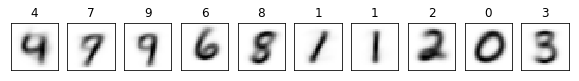

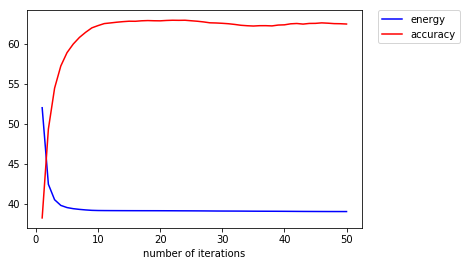

In [45]:
energy=[] #array for energy
accuracy=[] #array for accuracy
num_iteration=0 
for i in range(50): 
    assignLabel(list_image,average_image,label,distance) #update labels
    average_image=computeCentroid(k,list_image,label)    #update average_image
    energy.append(computeEnergy(distance))
    accuracy.append(computeAccuracy(label,list_label,k))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance)," Accuracy: ",computeAccuracy(label,list_label,k))
plotCentoidImages(label,list_label,average_image)    #plot average_image
plotEnergyAndAccuracy(energy,accuracy) #plot energy and accuracy

$$K = 15$$

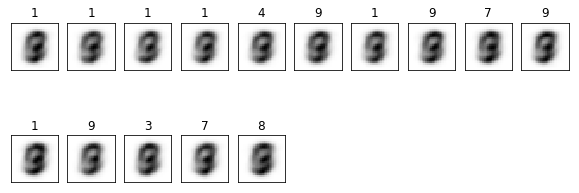

In [46]:
k,label,average_image,distance=generateCluster(15,count) #choose the num of cluster
initializeLabel(k,label) #randomly initialize labels
average_image=computeCentroid(k,list_image,label) #compute the average image
plotCentoidImages(label,list_label,average_image) #plot the average images

1th iteration -   Energy:  51.72112102024015  Accuracy:  39.180284882831685
2th iteration -   Energy:  41.036083640394374  Accuracy:  50.07304482735781
3th iteration -   Energy:  38.560822155085646  Accuracy:  55.56942815488565
4th iteration -   Energy:  37.7406388015983  Accuracy:  59.209350207993765
5th iteration -   Energy:  37.34803315554139  Accuracy:  62.44753485025426
6th iteration -   Energy:  37.149089707591806  Accuracy:  64.5187674248956
7th iteration -   Energy:  37.03480114333865  Accuracy:  65.78989501284708
8th iteration -   Energy:  36.96369495006724  Accuracy:  66.83775373422918
9th iteration -   Energy:  36.904397549076755  Accuracy:  67.94821315940744
10th iteration -   Energy:  36.86720623753923  Accuracy:  68.5287462088827
11th iteration -   Energy:  36.84518659260029  Accuracy:  68.77997944337645
12th iteration -   Energy:  36.83163356125998  Accuracy:  69.03064997521717
13th iteration -   Energy:  36.8220971544045  Accuracy:  69.2841602256147
14th iteration -   E

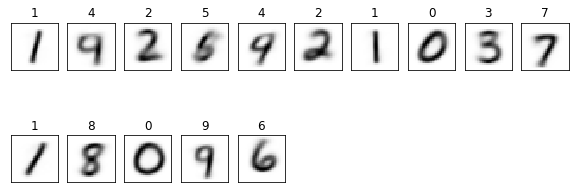

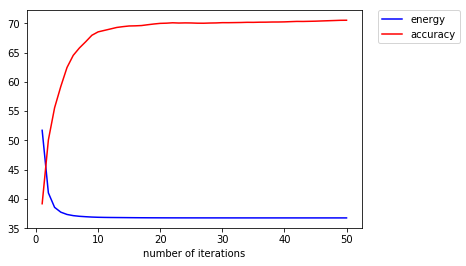

In [47]:
energy=[] #array for energy
accuracy=[] #array for accuracy
num_iteration=0 
for i in range(50): 
    assignLabel(list_image,average_image,label,distance) #update labels
    average_image=computeCentroid(k,list_image,label)    #update average_image
    energy.append(computeEnergy(distance))
    accuracy.append(computeAccuracy(label,list_label,k))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance)," Accuracy: ",computeAccuracy(label,list_label,k))
plotCentoidImages(label,list_label,average_image)    #plot average_image
plotEnergyAndAccuracy(energy,accuracy) #plot energy and accuracy

$$K = 20$$

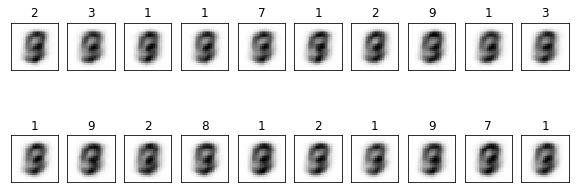

In [48]:
k,label,average_image,distance=generateCluster(20,count) #choose the num of cluster
initializeLabel(k,label) #randomly initialize labels
average_image=computeCentroid(k,list_image,label) #compute the average image
plotCentoidImages(label,list_label,average_image) #plot the average images

1th iteration -   Energy:  51.59170386458111  Accuracy:  39.24572368069997
2th iteration -   Energy:  40.609486368679086  Accuracy:  55.893721014797734
3th iteration -   Energy:  37.139870266447  Accuracy:  62.25189568182602
4th iteration -   Energy:  36.183157549910966  Accuracy:  64.47387282552185
5th iteration -   Energy:  35.82096567119981  Accuracy:  65.44018420445495
6th iteration -   Energy:  35.6574520463815  Accuracy:  65.36282769668823
7th iteration -   Energy:  35.54866908217944  Accuracy:  65.29242649786846
8th iteration -   Energy:  35.45477309936597  Accuracy:  66.09690987481727
9th iteration -   Energy:  35.386075222925484  Accuracy:  67.03613895049457
10th iteration -   Energy:  35.345271202775415  Accuracy:  67.43518494658818
11th iteration -   Energy:  35.31090274960297  Accuracy:  67.91542117471305
12th iteration -   Energy:  35.281755443421794  Accuracy:  68.35084249558814
13th iteration -   Energy:  35.25624226876553  Accuracy:  68.77364815918641
14th iteration -  

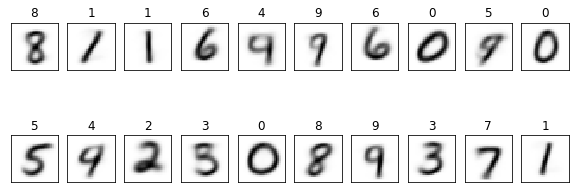

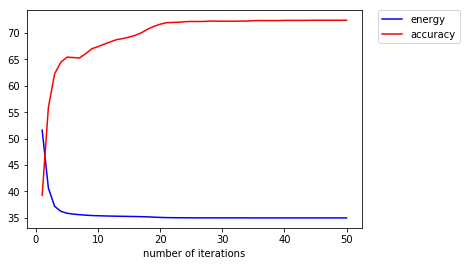

In [49]:
energy=[] #array for energy
accuracy=[] #array for accuracy
num_iteration=0 
for i in range(50): 
    assignLabel(list_image,average_image,label,distance) #update labels
    average_image=computeCentroid(k,list_image,label)    #update average_image
    energy.append(computeEnergy(distance))
    accuracy.append(computeAccuracy(label,list_label,k))
    num_iteration+=1
    print("%dth iteration - "%num_iteration," Energy: ",computeEnergy(distance)," Accuracy: ",computeAccuracy(label,list_label,k))
plotCentoidImages(label,list_label,average_image)    #plot average_image
plotEnergyAndAccuracy(energy,accuracy) #plot energy and accuracy